In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import seaborn as sns

In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset shape:", df.shape)
print("\nNumber of features:", len(data.feature_names))
print("\nTarget distribution:")
print(df['target'].value_counts())
print("\nTarget classes:", data.target_names)
print("\nFirst few rows:")
print(df.iloc[:, :5].head())

Dataset shape: (178, 14)

Number of features: 13

Target distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64

Target classes: ['class_0' 'class_1' 'class_2']

First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium
0    14.23        1.71  2.43               15.6      127.0
1    13.20        1.78  2.14               11.2      100.0
2    13.16        2.36  2.67               18.6      101.0
3    14.37        1.95  2.50               16.8      113.0
4    13.24        2.59  2.87               21.0      118.0


In [3]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

print("--- LDA Results ---")
print(f"Original features: {X.shape[1]}")
print(f"LDA components: {X_lda.shape[1]}")
print(f"Explained variance ratio: {lda.explained_variance_ratio_}")
print(f"Total variance explained: {sum(lda.explained_variance_ratio_)*100:.2f}%")

--- LDA Results ---
Original features: 13
LDA components: 2
Explained variance ratio: [0.68747889 0.31252111]
Total variance explained: 100.00%


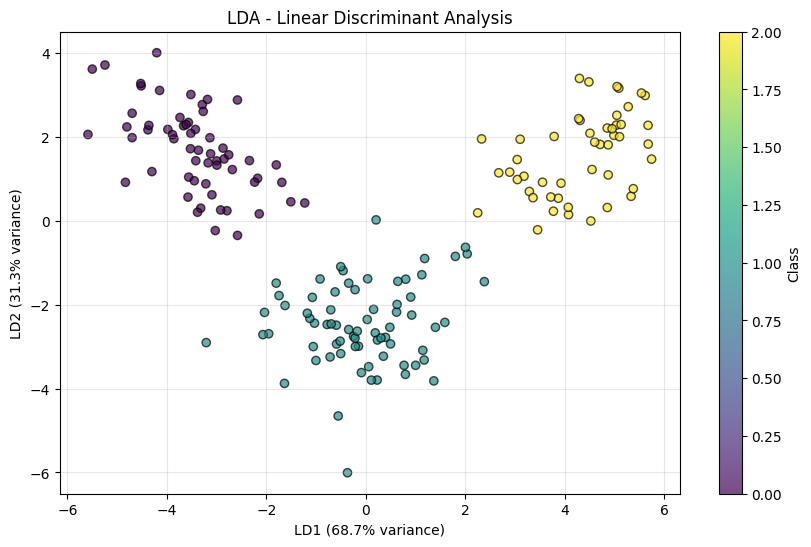

In [4]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Class')
plt.xlabel(f'LD1 ({lda.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'LD2 ({lda.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('LDA - Linear Discriminant Analysis')
plt.grid(True, alpha=0.3)
plt.show()

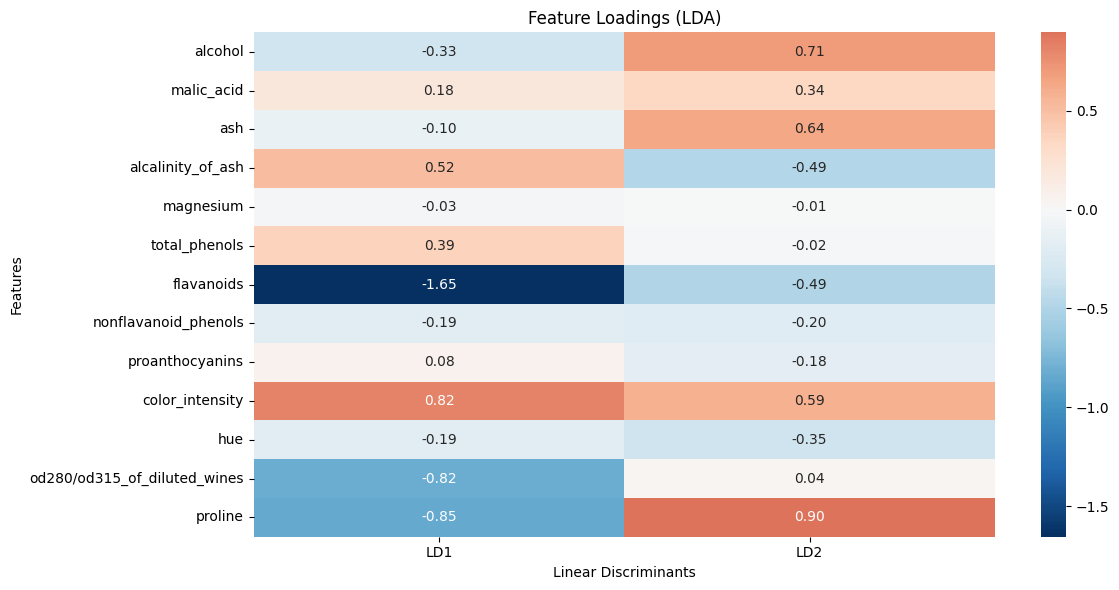


Top features for LD1:
flavanoids                      1.654628
proline                         0.845097
color_intensity                 0.820805
od280/od315_of_diluted_wines    0.819544
alcalinity_of_ash               0.515503
Name: LD1, dtype: float64

Top features for LD2:
proline            0.895899
alcohol            0.705754
ash                0.641759
color_intensity    0.585410
flavanoids         0.490054
Name: LD2, dtype: float64


In [5]:
loadings = pd.DataFrame(lda.scalings_[:, :2], 
                        columns=['LD1', 'LD2'],
                        index=data.feature_names)

plt.figure(figsize=(12, 6))
sns.heatmap(loadings, cmap='RdBu_r', center=0, annot=True, fmt='.2f')
plt.title('Feature Loadings (LDA)')
plt.xlabel('Linear Discriminants')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop features for LD1:")
print(loadings['LD1'].abs().sort_values(ascending=False).head())

print("\nTop features for LD2:")
print(loadings['LD2'].abs().sort_values(ascending=False).head())

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
accuracy_original = accuracy_score(y_test, lr.predict(X_test))

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
lda_components = X_train_lda.shape[1]

lr_lda = LogisticRegression(random_state=42, max_iter=1000)
lr_lda.fit(X_train_lda, y_train)
accuracy_lda = accuracy_score(y_test, lr_lda.predict(X_test_lda))

print("--- Model Comparison ---")
print(f"Logistic Regression (Original {X.shape[1]} features): {accuracy_original:.4f}")
print(f"Logistic Regression (LDA {lda_components} components): {accuracy_lda:.4f}")
print(f"\nDimensionality reduction: {X.shape[1]} → {lda_components} ({lda_components/X.shape[1]*100:.1f}% of original)")

--- Model Comparison ---
Logistic Regression (Original 13 features): 1.0000
Logistic Regression (LDA 2 components): 1.0000

Dimensionality reduction: 13 → 2 (15.4% of original)
